In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
inputs=df.drop(['Outcome'],axis=1)

In [ ]:
target=df['Outcome']

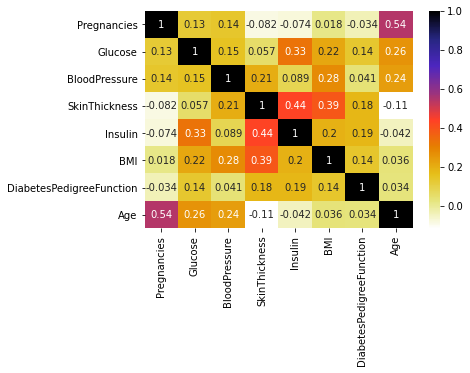

In [ ]:
cor = inputs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(inputs, 0.9)
len(set(corr_features))

0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape


(154,)

In [ ]:
y_test.shape



(154,)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ReLU,ELU
from keras.layers import Dropout

In [ ]:
clf=Sequential()

In [ ]:
clf.add(Dense(units=10,kernel_initializer='he_uniform',activation='elu',input_dim=8))

In [ ]:
clf.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu'))


In [ ]:
clf.add(Dense(units=20,kernel_initializer='he_uniform',activation='elu'))


In [ ]:
clf.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))


In [ ]:
clf.add(Dense(units=32,kernel_initializer='he_uniform',activation='elu'))


In [ ]:
clf.add(Dense(units=12,kernel_initializer='he_uniform',activation='relu'))


In [ ]:
clf.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [ ]:
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])


In [ ]:
model=clf.fit(X_train,y_train,validation_split=0.33,batch_size=20,epochs=100)

Epoch 1/100
21/21 [==============================] - 2s 24ms/step - loss: 9.0188 - accuracy: 0.6514 - val_loss: 1.0081 - val_accuracy: 0.6798
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 1.1170 - accuracy: 0.6374 - val_loss: 0.7375 - val_accuracy: 0.6650
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7585 - accuracy: 0.6274 - val_loss: 0.6840 - val_accuracy: 0.6601
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6651 - val_loss: 0.6665 - val_accuracy: 0.6552
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6550 - val_loss: 0.6595 - val_accuracy: 0.6552
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6643 - val_loss: 0.6663 - val_accuracy: 0.6552
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.6672 - val_loss: 0.6471 - val_accuracy: 0.6601
Epoch 8/100


In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred=(y_pred>0.5)


In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)

In [ ]:
ac

0.7272727272727273